In [1]:
import random, os, sys, shutil
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Please note that the dataseet used in this notebook was obtained from the following URL: https://www.kaggle.com/datasets/uciml/autompg-dataset

In [70]:
df = pd.read_csv("./auto-mpg-dataset/auto-mpg.csv")

In [3]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [4]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [71]:
# The "horsepower" column contains a few values that are marked as "?". This code drops the rows which contain
# such values.

df = df[df.horsepower != '?']

In [6]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [7]:
df.isna().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

In [8]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-8-f0f86bb9996e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
<ipython-input-8-f0f86bb9996e>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.00,-0.78,-0.81,-0.83,0.42,0.58,0.57
cylinders,-0.78,1.00,0.95,0.90,-0.50,-0.35,-0.57
displacement,-0.81,0.95,1.00,0.93,-0.54,-0.37,-0.61
weight,-0.83,0.90,0.93,1.00,-0.42,-0.31,-0.59
acceleration,0.42,-0.50,-0.54,-0.42,1.00,0.29,0.21
model year,0.58,-0.35,-0.37,-0.31,0.29,1.00,0.18
origin,0.57,-0.57,-0.61,-0.59,0.21,0.18,1.00


In [72]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [73]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='r', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_clusters(clusterer, X):
    labels = clusterer.predict(X)
    pca = PCA(n_components=2)
    x_2d = pca.fit_transform(X)
    plt.scatter(x_2d[:, 0], x_2d[:, 1], c=labels, alpha=0.3)
    plot_centroids(clusterer.cluster_centers_)

# Cluster and plot all of the features with K means

In [74]:
x = df
#x_scaled = x.drop("mpg", axis = 1)
#x_scaled = x_scaled.drop("acceleration", axis = 1)
#x_scaled = x_scaled.drop("model year", axis = 1)
x_scaled = x.drop("origin", axis = 1)
#x_scaled = x_scaled.drop("car name", axis = 1)
#x_scaled = x_scaled.drop("mpg", axis = 1)
#x_scaled = x_scaled.drop("cylinders", axis = 1)
#x_scaled = x_scaled.drop("displacement", axis = 1)
x_scaled = x_scaled.drop("car name", axis = 1)
#x_scaled = x_scaled.drop("horsepower", axis = 1)
#x_scaled = x_scaled.drop("weight", axis = 1)
#x_scaled = x_scaled.drop("acceleration", axis = 1)
x_scaled = x_scaled.drop("model year", axis = 1)

In [75]:
#Standardise
x_scaled = StandardScaler().fit_transform(x_scaled)

In [76]:
#Get reduced dimensions
pca = PCA(n_components=2)
x_2d = pca.fit_transform(x_scaled)

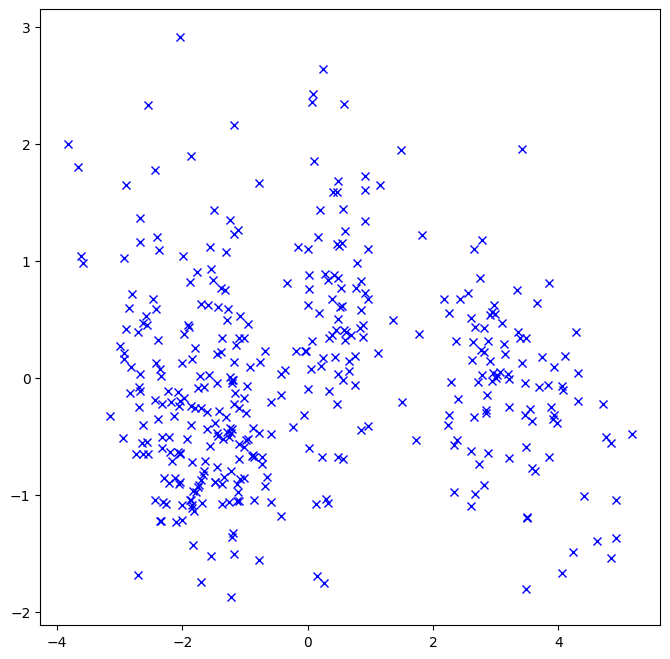

In [77]:
#Plot
plt.figure(figsize=(8, 8))
a = plt.plot(x_2d[:,0],x_2d[:,1],"bx")

The visual representation of the data using a 2D PCA plot shows that the data points are divided into three separate and well-defined groups. This indicates that the two selected variables were effective in capturing the relevant patterns and relationships within the data.

/home/dm/miniconda3/envs/ds/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/dm/miniconda3/envs/ds/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/dm/miniconda3/envs/ds/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/dm/miniconda3/envs/ds/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/hom

([<matplotlib.axis.XTick at 0x7f36c8271790>,
 [Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7'),
  Text(8.0, 0, '8'),
  Text(9.0, 0, '9'),
  Text(10.0, 0, '10'),
  Text(11.0, 0, '11'),
  Text(12.0, 0, '12'),
  Text(13.0, 0, '13'),
  Text(14.0, 0, '14'),
  Text(15.0, 0, '15'),
  Text(16.0, 0, '16'),
  Text(17.0, 0, '17'),
  Text(18.0, 0, '18'),
  Text(19.0, 0, '19'),
  Text(20.0, 0, '20')])

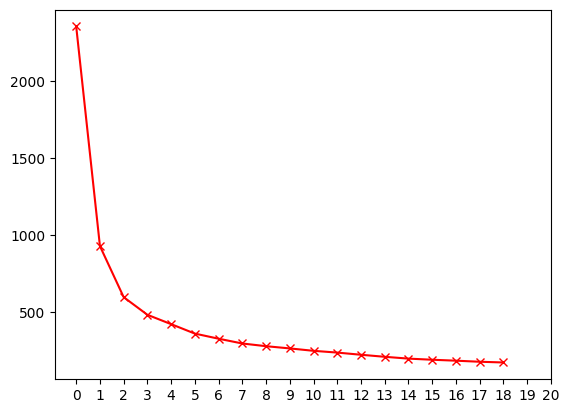

In [78]:
scores=[]
for i in range(1,20):
    #Fit for k
    means=KMeans(n_clusters=i)
    means.fit(x_scaled)
    #Get inertia
    scores.append(means.inertia_)
plt.plot(scores,"-rx")
plt.xticks(np.arange(0, 21, 1.0))

/home/dm/miniconda3/envs/ds/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


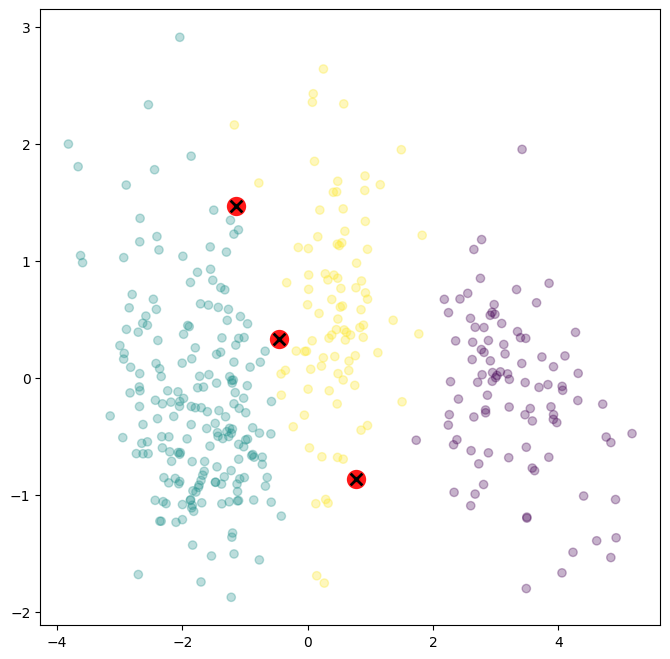

In [79]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x_scaled)
plt.figure(figsize=(8, 8))
#Plot clusters onto PCA reduced plot
plot_clusters(kmeans, x_scaled)

/home/dm/miniconda3/envs/ds/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


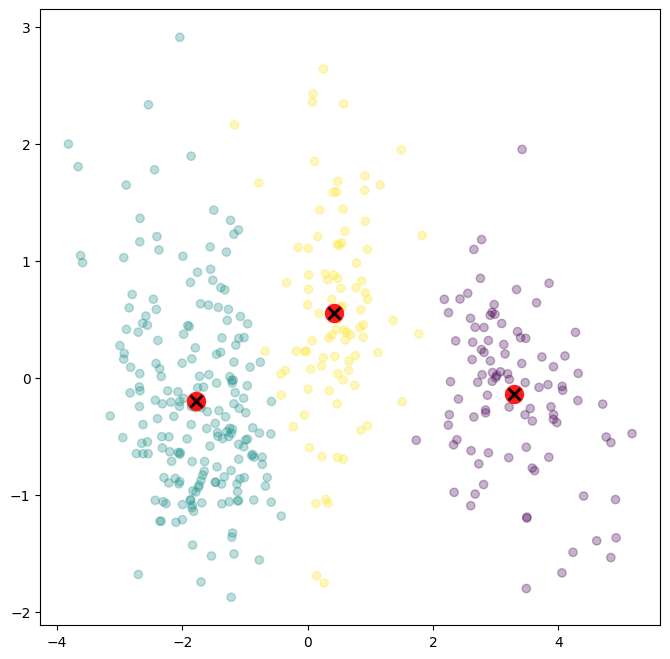

In [80]:
#How many dimensions to reduce to (before clustering)?
num_dimensions = 2 

#Reduce dimensions
pca = PCA(n_components=num_dimensions)
x_less_dimensions = pca.fit_transform(x_scaled)

#Fit cluster
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x_less_dimensions)

#Plot results on 2D plot
plt.figure(figsize=(8, 8))
plot_clusters(kmeans, x_less_dimensions)

After reviewing the plot, it is evident that the data points have been segregated into three well-defined clusters, with little to no overlapping. This suggests that the algorithm has been successful in clustering the data into three distinct groups. The presence of three separate clusters indicates that the algorithm was able to identify unique features within the data set and accurately distinguish between them, leading to the creation of three well-defined groups.


# Cluster and plot mpg, cylinders and displacement with K means

In [19]:
x = df
#x_scaled = x.drop("mpg", axis = 1)
#x_scaled = x_scaled.drop("acceleration", axis = 1)
#x_scaled = x_scaled.drop("model year", axis = 1)
x_scaled = x.drop("origin", axis = 1)
#x_scaled = x_scaled.drop("car name", axis = 1)
#x_scaled = x_scaled.drop("mpg", axis = 1)
#x_scaled = x_scaled.drop("cylinders", axis = 1)
#x_scaled = x_scaled.drop("displacement", axis = 1)
x_scaled = x_scaled.drop("car name", axis = 1)
x_scaled = x_scaled.drop("horsepower", axis = 1)
x_scaled = x_scaled.drop("weight", axis = 1)
x_scaled = x_scaled.drop("acceleration", axis = 1)
x_scaled = x_scaled.drop("model year", axis = 1)

In [20]:
#Standardise
x_scaled = StandardScaler().fit_transform(x_scaled)

In [21]:
#Get reduced dimensions
pca = PCA(n_components=2)
x_2d = pca.fit_transform(x_scaled)

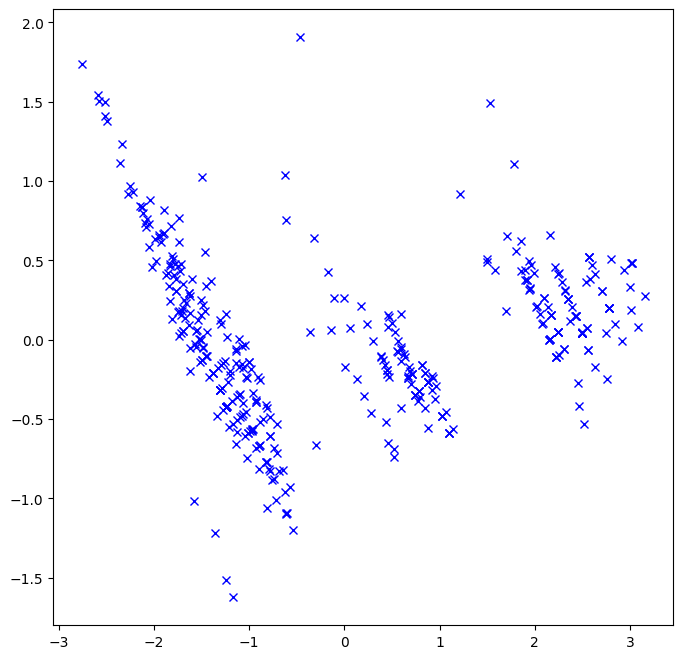

In [22]:
#Plot
plt.figure(figsize=(8, 8))
a = plt.plot(x_2d[:,0],x_2d[:,1],"bx")

The visual representation of the data using a 2D PCA plot shows that the data points are divided into three separate and well-defined groups. This indicates that the two selected variables were effective in capturing the relevant patterns and relationships within the data.

/home/dm/miniconda3/envs/ds/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/dm/miniconda3/envs/ds/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/dm/miniconda3/envs/ds/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/dm/miniconda3/envs/ds/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/hom

([<matplotlib.axis.XTick at 0x7f36e0f11ca0>,
 [Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7'),
  Text(8.0, 0, '8'),
  Text(9.0, 0, '9'),
  Text(10.0, 0, '10'),
  Text(11.0, 0, '11'),
  Text(12.0, 0, '12'),
  Text(13.0, 0, '13'),
  Text(14.0, 0, '14'),
  Text(15.0, 0, '15'),
  Text(16.0, 0, '16'),
  Text(17.0, 0, '17'),
  Text(18.0, 0, '18'),
  Text(19.0, 0, '19'),
  Text(20.0, 0, '20')])

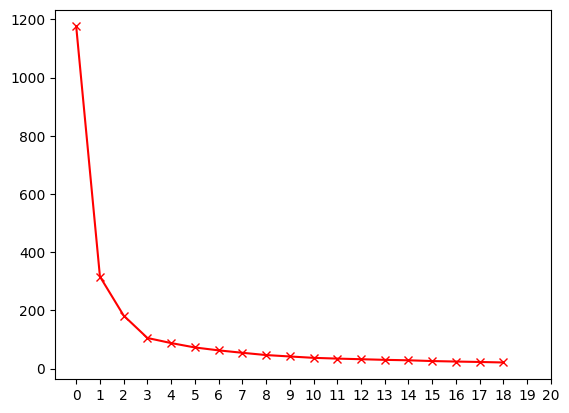

In [23]:
scores=[]
for i in range(1,20):
    #Fit for k
    means=KMeans(n_clusters=i)
    means.fit(x_scaled)
    #Get inertia
    scores.append(means.inertia_)
plt.plot(scores,"-rx")
plt.xticks(np.arange(0, 21, 1.0))

/home/dm/miniconda3/envs/ds/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


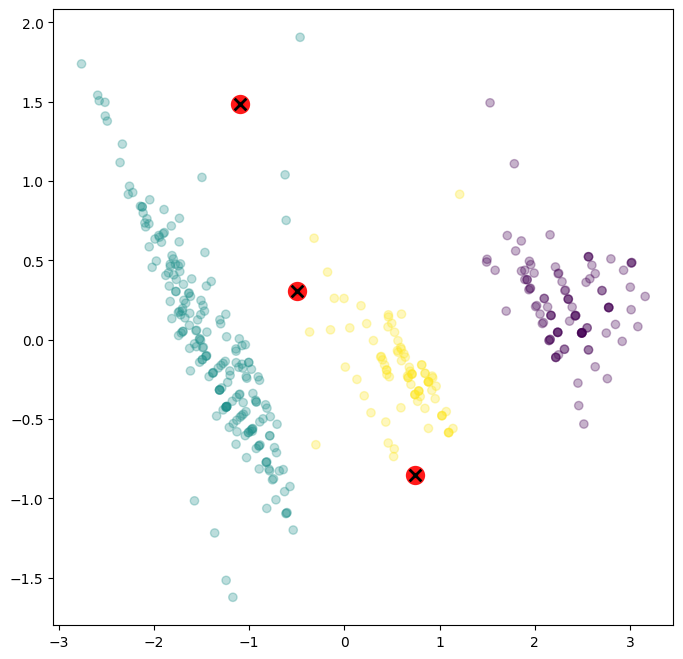

In [24]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x_scaled)
plt.figure(figsize=(8, 8))
#Plot clusters onto PCA reduced plot
plot_clusters(kmeans, x_scaled)

/home/dm/miniconda3/envs/ds/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


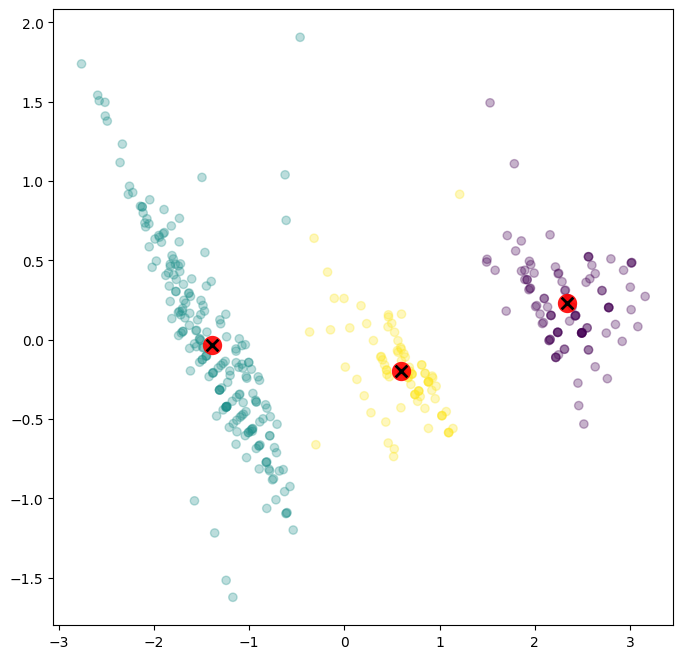

In [25]:
#How many dimensions to reduce to (before clustering)?
num_dimensions = 2 

#Reduce dimensions
pca = PCA(n_components=num_dimensions)
x_less_dimensions = pca.fit_transform(x_scaled)

#Fit cluster
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x_less_dimensions)

#Plot results on 2D plot
plt.figure(figsize=(8, 8))
plot_clusters(kmeans, x_less_dimensions)

Upon close examination of the plot, it can be observed that the vast majority of the data points have been clearly separated into three well-defined clusters, suggesting that the algorithm has been successful in clustering the data into three groups. The limited overlap between the clusters further indicates that the algorithm was able to accurately identify unique features and effectively differentiate between them, leading to the formation of three distinct groups. Nevertheless, there are a few data points that lie outside of the three clusters and do not appear to belong to any of them. These outliers could be a result of noise or errors in the data, or they could represent unique data points that require further analysis.

# Cluster and plot  horsepower, weight and acceleration with K means

In [27]:
x = df
#x_scaled = x.drop("mpg", axis = 1)
#x_scaled = x_scaled.drop("acceleration", axis = 1)
#x_scaled = x_scaled.drop("model year", axis = 1)
x_scaled = x.drop("origin", axis = 1)
x_scaled = x_scaled.drop("car name", axis = 1)
#x_scaled = x_scaled.drop("car name", axis = 1)
x_scaled = x_scaled.drop("mpg", axis = 1)
x_scaled = x_scaled.drop("cylinders", axis = 1)
#x_scaled = x_scaled.drop("horsepower", axis = 1)
#x_scaled = x_scaled.drop("weight", axis = 1)
#x_scaled = x_scaled.drop("acceleration", axis = 1)
x_scaled = x_scaled.drop("model year", axis = 1)
x_scaled = x_scaled.drop("displacement", axis = 1)

In [28]:
#Standardise
x_scaled = StandardScaler().fit_transform(x_scaled)

In [29]:
#Get reduced dimensions
pca = PCA(n_components=2)
x_2d = pca.fit_transform(x_scaled)

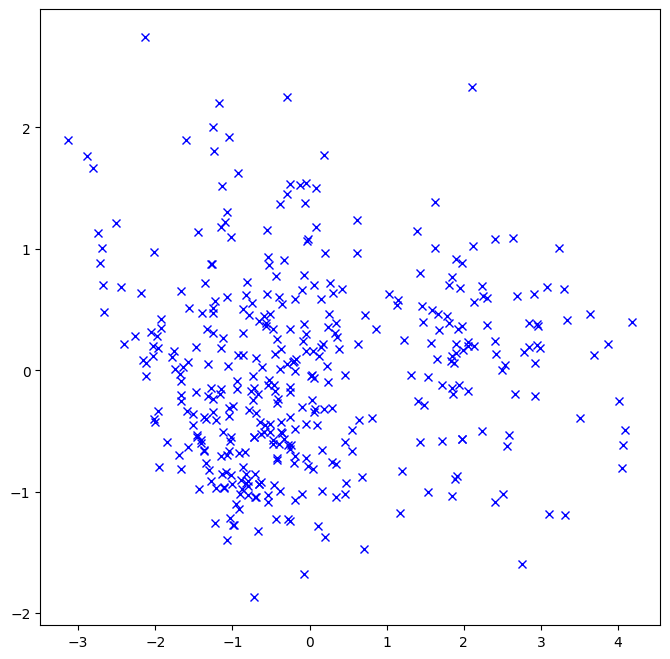

In [30]:
#Plot
plt.figure(figsize=(8, 8))
a = plt.plot(x_2d[:,0],x_2d[:,1],"bx")

This time the visual representation of the data using a 2D PCA plot shows that the data points are divided into two separate and well-defined groups. This indicates that the two selected variables were effective in capturing the relevant patterns and relationships within the data.

/home/dm/miniconda3/envs/ds/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/dm/miniconda3/envs/ds/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/dm/miniconda3/envs/ds/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/dm/miniconda3/envs/ds/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/hom

([<matplotlib.axis.XTick at 0x7f36e01b88b0>,
 [Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7'),
  Text(8.0, 0, '8'),
  Text(9.0, 0, '9'),
  Text(10.0, 0, '10'),
  Text(11.0, 0, '11'),
  Text(12.0, 0, '12'),
  Text(13.0, 0, '13'),
  Text(14.0, 0, '14'),
  Text(15.0, 0, '15'),
  Text(16.0, 0, '16'),
  Text(17.0, 0, '17'),
  Text(18.0, 0, '18'),
  Text(19.0, 0, '19'),
  Text(20.0, 0, '20')])

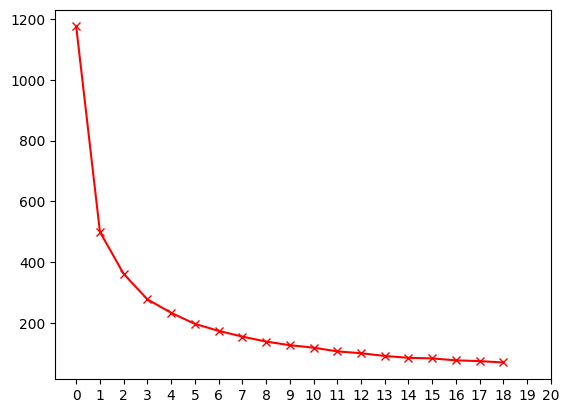

In [31]:
scores=[]
for i in range(1,20):
    #Fit for k
    means=KMeans(n_clusters=i)
    means.fit(x_scaled)
    #Get inertia
    scores.append(means.inertia_)
plt.plot(scores,"-rx")
plt.xticks(np.arange(0, 21, 1.0))

/home/dm/miniconda3/envs/ds/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


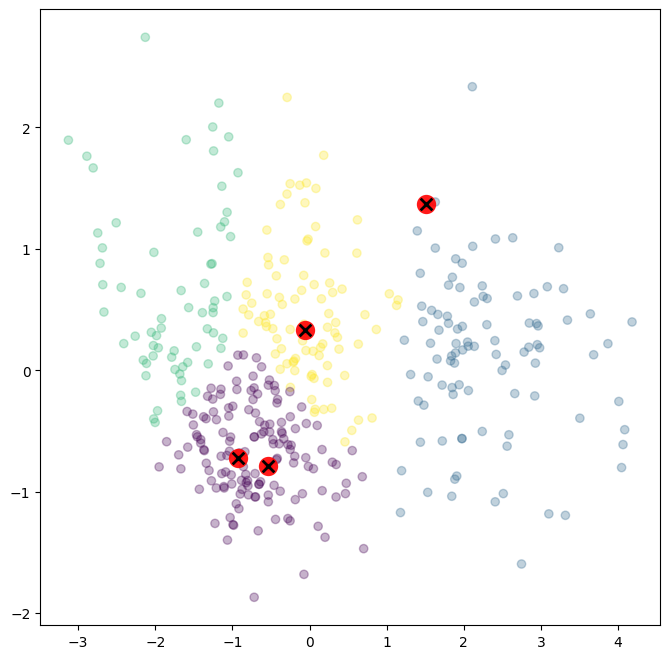

In [32]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x_scaled)
plt.figure(figsize=(8, 8))
#Plot clusters onto PCA reduced plot
plot_clusters(kmeans, x_scaled)

/home/dm/miniconda3/envs/ds/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


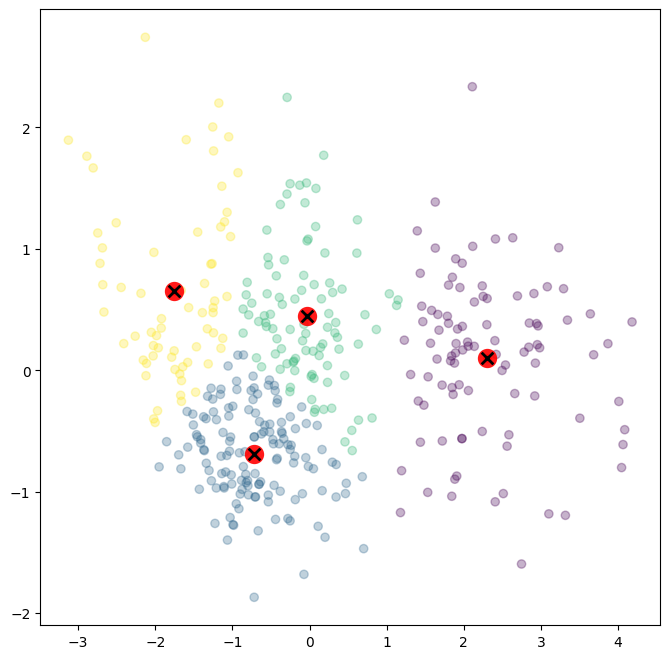

In [33]:
#How many dimensions to reduce to (before clustering)?
num_dimensions = 2 

#Reduce dimensions
pca = PCA(n_components=num_dimensions)
x_less_dimensions = pca.fit_transform(x_scaled)

#Fit cluster
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x_less_dimensions)

#Plot results on 2D plot
plt.figure(figsize=(8, 8))
plot_clusters(kmeans, x_less_dimensions)

After analyzing the plot, it is clear that the data points have been separated into two primary groups. However, one of the groups displays a noticeable lack of clear clustering, indicating that the algorithm may be facing difficulties in distinguishing between certain features within that group. This could be attributed to various factors, such as inherent noise or errors in the data or the algorithm's inability to accurately cluster the data. Further investigation and refinement of the algorithm may be required to address these issues and improve the clustering performance for this particular dataset.

<ipython-input-34-5e40685e0b60>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["cluster"] = labels


Text(0.5, 0, 'cluster number')

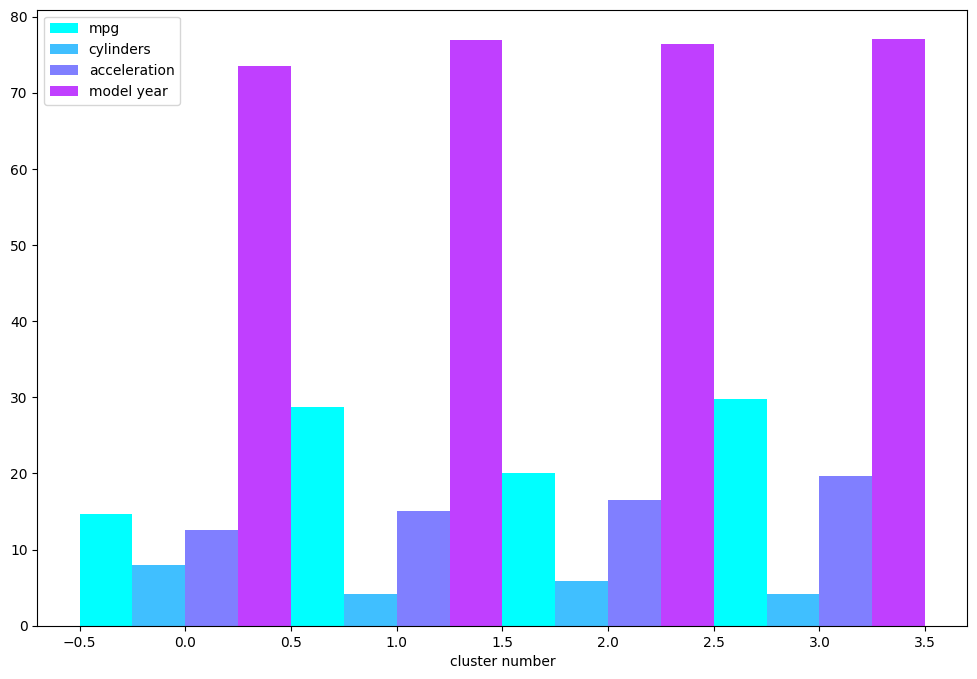

In [34]:
#Add cluster labels as extra column in dataframe
labels = kmeans.predict(x_less_dimensions)
x["cluster"] = labels

#Pick some features to plot
features = ['mpg', 'cylinders', 'acceleration', 'model year']
width = 1/(len(features))

fig,ax = plt.subplots(figsize=(12, 8))

for i in range(k):
    ax.bar([i],[1],width=width*4,color = "azure" if i%2==0 else "whitesmoke")

cmap = plt.cm.get_cmap('cool')
#Iterate through features
for index, f in enumerate(features):
    #Get mean for each feature for each cluster
    data = [np.mean(x[x["cluster"]==i][f]) for i in range(k)]
    
    x_vals = np.arange(len(data)) + (width*index) - 0.5 + width/2
    
    #Plot this feature for each cluster
    ax.bar(x_vals, data, width = width, label = f, color = cmap(index/len(features)))
    
ax.legend()
ax.set_xlabel("cluster number")

# Cluster and plot all features with Gaussian mixture models

In [35]:
import random, os, sys, shutil
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
df = pd.read_csv("./auto-mpg-dataset/auto-mpg.csv")

In [37]:
df = df[df.horsepower != '?']

In [38]:
x = df
#x_scaled = x.drop("mpg", axis = 1)
#x_scaled = x_scaled.drop("acceleration", axis = 1)
#x_scaled = x_scaled.drop("model year", axis = 1)
x_scaled = x.drop("origin", axis = 1)
#x_scaled = x_scaled.drop("car name", axis = 1)
#x_scaled = x_scaled.drop("mpg", axis = 1)
#x_scaled = x_scaled.drop("cylinders", axis = 1)
#x_scaled = x_scaled.drop("displacement", axis = 1)
x_scaled = x_scaled.drop("car name", axis = 1)
#x_scaled = x_scaled.drop("horsepower", axis = 1)
#x_scaled = x_scaled.drop("weight", axis = 1)
#x_scaled = x_scaled.drop("acceleration", axis = 1)
x_scaled = x_scaled.drop("model year", axis = 1)

In [39]:
#Standardise
x_scaled = StandardScaler().fit_transform(x_scaled)

In [40]:
#Get reduced dimensions
pca = PCA(n_components=2)
x_2d = pca.fit_transform(x_scaled)

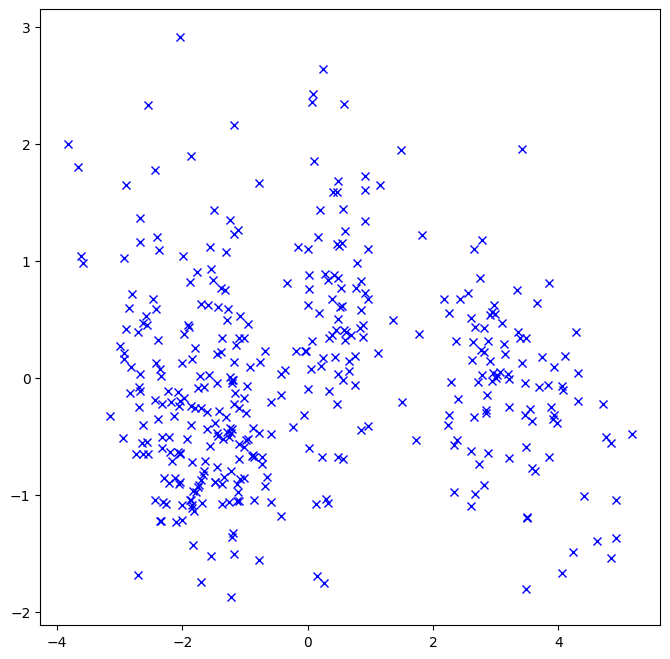

In [41]:
#Plot
plt.figure(figsize=(8, 8))
a = plt.plot(x_2d[:,0],x_2d[:,1],"bx")

In [42]:
def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)


param_grid = {
    "n_components": range(1, 7),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = GridSearchCV(
    GaussianMixture(), param_grid=param_grid, scoring=gmm_bic_score
)
grid_search.fit(x_scaled)

GridSearchCV(estimator=GaussianMixture(),
             param_grid={'covariance_type': ['spherical', 'tied', 'diag',
                                             'full'],
                         'n_components': range(1, 7)},
             scoring=<function gmm_bic_score at 0x7f36e0f6b160>)

In [43]:
bic_scores = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
bic_scores["mean_test_score"] = -bic_scores["mean_test_score"]
bic_scores = bic_scores.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
bic_score = bic_scores.sort_values(by="BIC score").head()
print(bic_score)

   Number of components Type of covariance   BIC score
15                    4               diag   97.664252
16                    5               diag  115.671106
17                    6               diag  156.037119
14                    3               diag  399.857329
20                    3               full  435.368757


In [44]:
k = bic_score.iloc[0,0]
cov_type = bic_score.iloc[0,1]

In [45]:
def plot_clusters(clusterer, X):
    labels = clusterer.predict(X)
    pca = PCA(n_components=2)
    x_2d = pca.fit_transform(X)
    plt.scatter(x_2d[:, 0], x_2d[:, 1], c=labels, alpha=0.3)

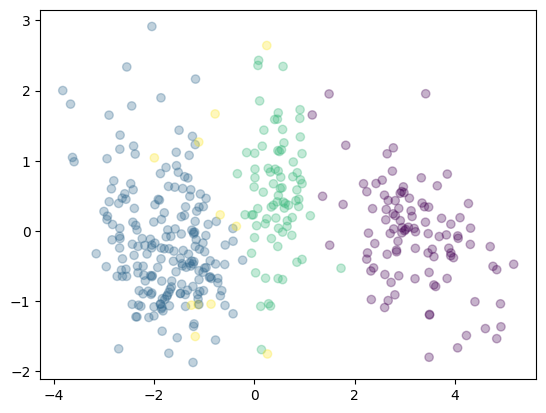

In [46]:
gmm = GaussianMixture(n_components=k, covariance_type=cov_type, random_state=42)
gmm = gmm.fit(x_scaled)
plot_clusters(gmm, x_scaled)

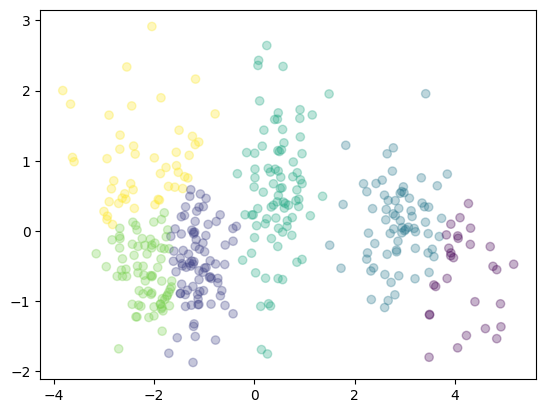

In [47]:
#How many dimensions to reduce to (before clustering)?
num_dimensions = 2

#Reduce dimensions
pca = PCA(n_components=num_dimensions)
x_less_dimensions = pca.fit_transform(x_scaled)

gmm = GaussianMixture(n_components=6, covariance_type='diag', random_state=42)
gmm = gmm.fit(x_less_dimensions)
plot_clusters(gmm, x_less_dimensions)

In [48]:
from matplotlib.patches import Ellipse

# Code for visualising GMM's from: https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle,  edgecolor='blue', linestyle=':', **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2, alpha=0.2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2, alpha=0.2)
    ax.axis('equal')
    
    w_factor = 0.3 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

<ipython-input-48-387189736a36>:19: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


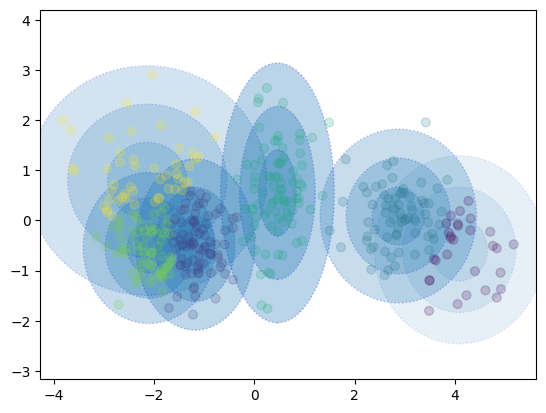

In [49]:
plot_gmm(gmm, x_less_dimensions)

# Cluster and plot mpg, cylinders and displacement with Gaussian mixture models

In [50]:
x = df
#x_scaled = x.drop("mpg", axis = 1)
#x_scaled = x_scaled.drop("acceleration", axis = 1)
#x_scaled = x_scaled.drop("model year", axis = 1)
x_scaled = x.drop("origin", axis = 1)
#x_scaled = x_scaled.drop("car name", axis = 1)
#x_scaled = x_scaled.drop("mpg", axis = 1)
#x_scaled = x_scaled.drop("cylinders", axis = 1)
#x_scaled = x_scaled.drop("displacement", axis = 1)
x_scaled = x_scaled.drop("car name", axis = 1)
x_scaled = x_scaled.drop("horsepower", axis = 1)
x_scaled = x_scaled.drop("weight", axis = 1)
x_scaled = x_scaled.drop("acceleration", axis = 1)
x_scaled = x_scaled.drop("model year", axis = 1)

In [51]:
#Standardise
x_scaled = StandardScaler().fit_transform(x_scaled)

In [52]:
#Get reduced dimensions
pca = PCA(n_components=2)
x_2d = pca.fit_transform(x_scaled)

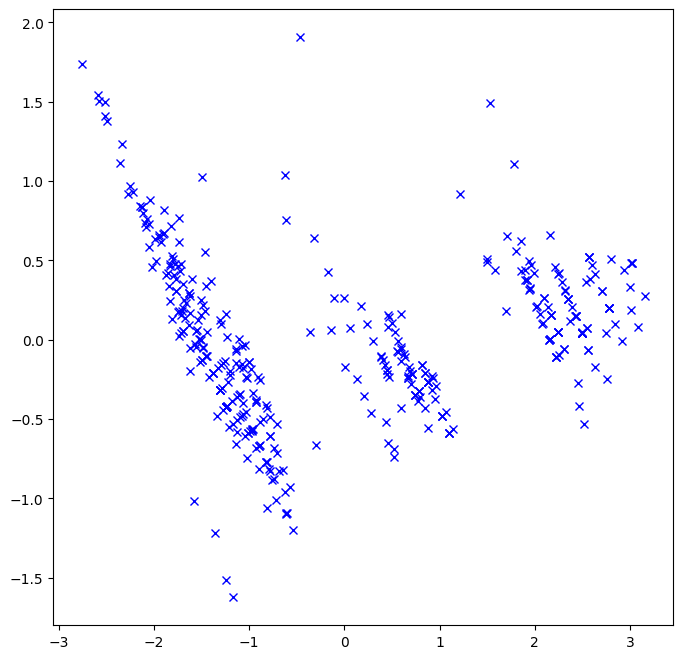

In [53]:
#Plot
plt.figure(figsize=(8, 8))
a = plt.plot(x_2d[:,0],x_2d[:,1],"bx")

In [54]:
def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)


param_grid = {
    "n_components": range(1, 7),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = GridSearchCV(
    GaussianMixture(), param_grid=param_grid, scoring=gmm_bic_score
)
grid_search.fit(x_scaled)

GridSearchCV(estimator=GaussianMixture(),
             param_grid={'covariance_type': ['spherical', 'tied', 'diag',
                                             'full'],
                         'n_components': range(1, 7)},
             scoring=<function gmm_bic_score at 0x7f36e10ef790>)

In [55]:
bic_scores = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
bic_scores["mean_test_score"] = -bic_scores["mean_test_score"]
bic_scores = bic_scores.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
bic_score = bic_scores.sort_values(by="BIC score").head()
print(bic_score)

   Number of components Type of covariance   BIC score
15                    4               diag -412.898653
16                    5               diag -397.789396
17                    6               diag -364.453311
21                    4               full -261.293742
14                    3               diag  -64.116242


In [56]:
k = bic_score.iloc[0,0]
cov_type = bic_score.iloc[0,1]

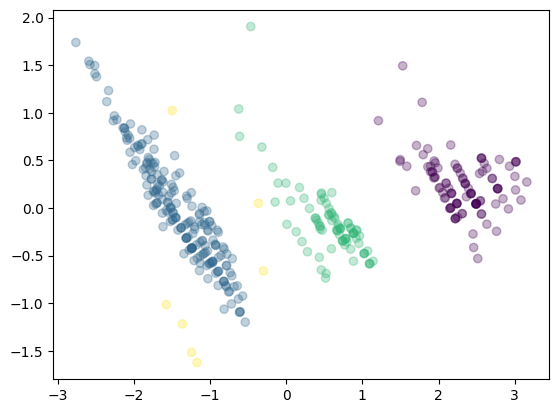

In [57]:
gmm = GaussianMixture(n_components=k, covariance_type=cov_type, random_state=42)
gmm = gmm.fit(x_scaled)
plot_clusters(gmm, x_scaled)

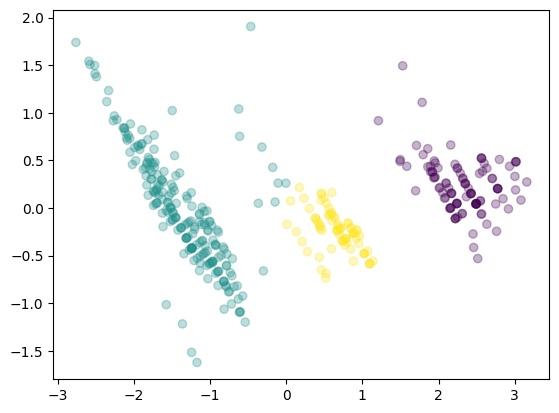

In [58]:
#How many dimensions to reduce to (before clustering)?
num_dimensions = 2

#Reduce dimensions
pca = PCA(n_components=num_dimensions)
x_less_dimensions = pca.fit_transform(x_scaled)

gmm = GaussianMixture(n_components=3, covariance_type='diag', random_state=42)
gmm = gmm.fit(x_less_dimensions)
plot_clusters(gmm, x_less_dimensions)

<ipython-input-48-387189736a36>:19: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


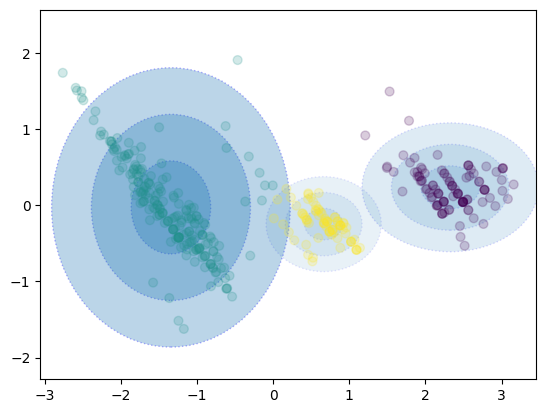

In [59]:
plot_gmm(gmm, x_less_dimensions)

# Cluster and plot horsepower, weight and acceleration with Gaussian mixture models

In [60]:
x = df
#df = df[df.horsepower != '?']
#x_scaled = x.drop("mpg", axis = 1)
#x_scaled = x_scaled.drop("acceleration", axis = 1)
#x_scaled = x_scaled.drop("model year", axis = 1)
x_scaled = x.drop("origin", axis = 1)
#x_scaled = x_scaled.drop("car name", axis = 1)
x_scaled = x_scaled.drop("mpg", axis = 1)
x_scaled = x_scaled.drop("cylinders", axis = 1)
x_scaled = x_scaled.drop("displacement", axis = 1)
x_scaled = x_scaled.drop("car name", axis = 1)
#x_scaled = x_scaled.drop("horsepower", axis = 1)
#x_scaled = x_scaled.drop("weight", axis = 1)
#x_scaled = x_scaled.drop("acceleration", axis = 1)
x_scaled = x_scaled.drop("model year", axis = 1)

In [61]:
#Standardise
x_scaled = StandardScaler().fit_transform(x_scaled)

In [62]:
#Get reduced dimensions
pca = PCA(n_components=2)
x_2d = pca.fit_transform(x_scaled)

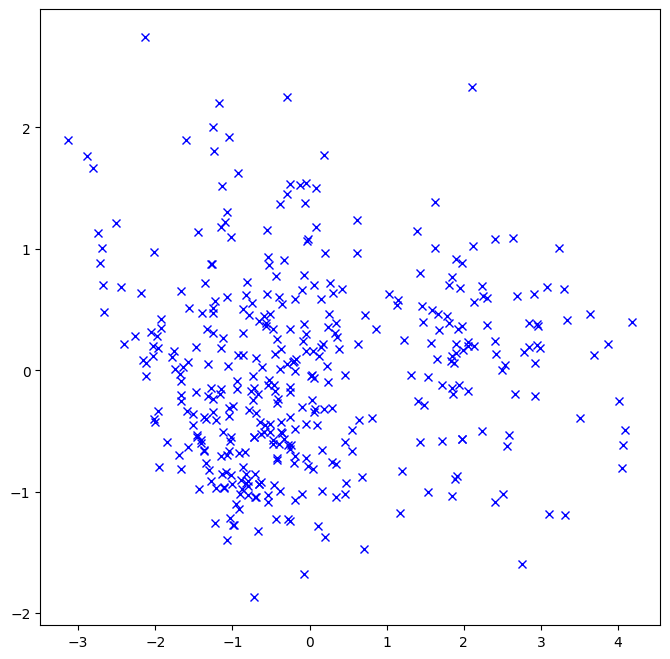

In [63]:
#Plot
plt.figure(figsize=(8, 8))
a = plt.plot(x_2d[:,0],x_2d[:,1],"bx")

In [64]:
def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)


param_grid = {
    "n_components": range(1, 7),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = GridSearchCV(
    GaussianMixture(), param_grid=param_grid, scoring=gmm_bic_score
)
grid_search.fit(x_scaled)

GridSearchCV(estimator=GaussianMixture(),
             param_grid={'covariance_type': ['spherical', 'tied', 'diag',
                                             'full'],
                         'n_components': range(1, 7)},
             scoring=<function gmm_bic_score at 0x7f36e0daf940>)

In [65]:
bic_scores = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
bic_scores["mean_test_score"] = -bic_scores["mean_test_score"]
bic_scores = bic_scores.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
bic_score = bic_scores.sort_values(by="BIC score").head()
print(bic_score)

   Number of components Type of covariance   BIC score
19                    2               full  559.543844
7                     2               tied  559.594802
6                     1               tied  563.996410
18                    1               full  563.996410
8                     3               tied  575.209683


In [66]:
k = bic_score.iloc[0,0]
cov_type = bic_score.iloc[0,1]

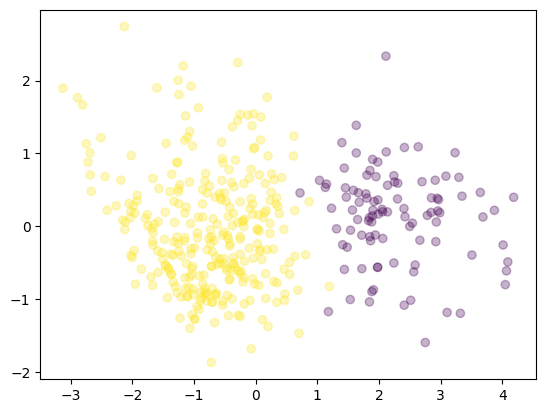

In [67]:
gmm = GaussianMixture(n_components=k, covariance_type=cov_type, random_state=42)
gmm = gmm.fit(x_scaled)
plot_clusters(gmm, x_scaled)

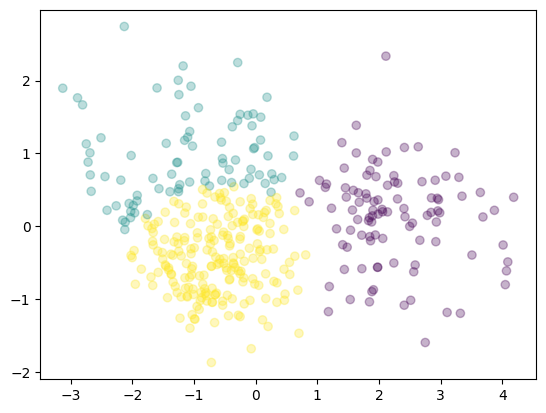

In [68]:
#How many dimensions to reduce to (before clustering)?
num_dimensions = 2

#Reduce dimensions
pca = PCA(n_components=num_dimensions)
x_less_dimensions = pca.fit_transform(x_scaled)

gmm = GaussianMixture(n_components=3, covariance_type='diag', random_state=42)
gmm = gmm.fit(x_less_dimensions)
plot_clusters(gmm, x_less_dimensions)

<ipython-input-48-387189736a36>:19: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


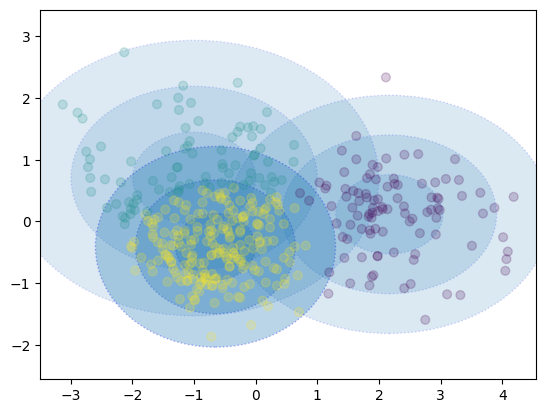

In [69]:
plot_gmm(gmm, x_less_dimensions)